In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import load_img

In [3]:
current_dir = !pwd
path = current_dir[0]+"/train/t-shirt"
name = "a4ff0158-4981-43d5-aed5-6898e5c1bfb2.jpg"
full_name = f'{path}/{name}'

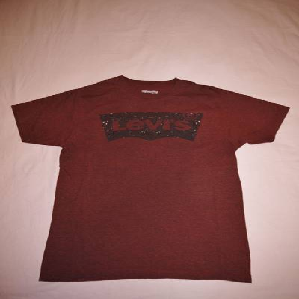

In [4]:
img = load_img(full_name, target_size=(299,299))
img 

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

In [6]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions

model = Xception(weights='imagenet', input_shape=(299,299,3))

X = np.array([x])

X.shape

X = preprocess_input(X)

pred = model.predict(X)

pred.shape

decode_predictions(pred)



Metal device set to: Apple M1


2024-10-30 14:45:07.638157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-30 14:45:07.638402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-10-30 14:45:11.459594: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-30 14:45:11.889483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


[[('n03595614', 'jersey', 0.9587685),
  ('n04370456', 'sweatshirt', 0.009531479),
  ('n04599235', 'wool', 0.004966254),
  ('n03710637', 'maillot', 0.00092296884),
  ('n04532106', 'vestment', 0.0007640812)]]

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('./train', 
                                         target_size=(150,150), 
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [9]:
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_directory('./validation', 
                                         target_size=(150,150), 
                                         batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [10]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [11]:
x,y = next(train_ds)

In [12]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
)

base_model.trainable = False

83683744/83683744 [==============================] - 15s 0us/step


In [13]:
#Functional Style
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training =False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [14]:
preds = model.predict(x)

2024-10-29 16:49:46.673914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


In [15]:
preds[0]

array([ 0.58134824,  0.2761232 ,  0.5636924 , -0.097817  ,  0.7701011 ,
        0.9171015 ,  0.24999669, -0.49228048, -0.32341897, -0.47578523],
      dtype=float32)

In [18]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])



In [19]:
training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10


2024-10-29 16:50:14.667866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.1033 - accuracy: 0.6346

2024-10-29 16:51:00.674333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 54s 530ms/step - loss: 1.1033 - accuracy: 0.6346 - val_loss: 0.7140 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 51s 537ms/step - loss: 0.6329 - accuracy: 0.7813 - val_loss: 0.6344 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 51s 533ms/step - loss: 0.5072 - accuracy: 0.8315 - val_loss: 0.5986 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 58s 599ms/step - loss: 0.4331 - accuracy: 0.8654 - val_loss: 0.5661 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 60s 629ms/step - loss: 0.3744 - accuracy: 0.8787 - val_loss: 0.5640 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 47s 494ms/step - loss: 0.3266 - accuracy: 0.9094 - val_loss: 0.5394 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 51s 536ms/step - loss: 0.2881 - accuracy: 0.9267 - val_loss: 0.5572 - val_accuracy: 0.8182
Epoch 8/10

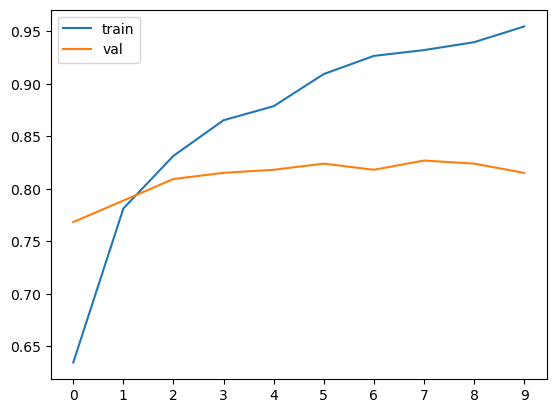

In [20]:
plt.plot(training_history.history['accuracy'], label = 'train')
plt.plot(training_history.history['val_accuracy'], label = 'val')
plt.xticks(np.arange(10))

plt.legend()

In [24]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [25]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
    scores[lr]= training_history.history
    print()
    print()

0.0001
Epoch 1/10


2024-10-29 17:01:43.955753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.9483 - accuracy: 0.3559

2024-10-29 17:02:32.583789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 57s 576ms/step - loss: 1.9483 - accuracy: 0.3559 - val_loss: 1.5954 - val_accuracy: 0.4985
Epoch 2/10
96/96 [==============================] - 58s 607ms/step - loss: 1.3865 - accuracy: 0.5642 - val_loss: 1.2397 - val_accuracy: 0.6217
Epoch 3/10
96/96 [==============================] - 52s 538ms/step - loss: 1.1376 - accuracy: 0.6359 - val_loss: 1.0672 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 46s 479ms/step - loss: 0.9992 - accuracy: 0.6816 - val_loss: 0.9610 - val_accuracy: 0.7126
Epoch 5/10
96/96 [==============================] - 45s 468ms/step - loss: 0.9078 - accuracy: 0.7034 - val_loss: 0.8856 - val_accuracy: 0.7302
Epoch 6/10
96/96 [==============================] - 46s 475ms/step - loss: 0.8416 - accuracy: 0.7194 - val_loss: 0.8314 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 47s 489ms/step - loss: 0.7893 - accuracy: 0.7383 - val_loss: 0.7919 - val_accuracy: 0.7537
Epoch 8/10

2024-10-29 17:09:57.394016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0686 - accuracy: 0.6353

2024-10-29 17:10:40.379892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 49s 497ms/step - loss: 1.0686 - accuracy: 0.6353 - val_loss: 0.6971 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 54s 560ms/step - loss: 0.6236 - accuracy: 0.7904 - val_loss: 0.6175 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 48s 503ms/step - loss: 0.5089 - accuracy: 0.8318 - val_loss: 0.6024 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 47s 492ms/step - loss: 0.4232 - accuracy: 0.8615 - val_loss: 0.5617 - val_accuracy: 0.8358
Epoch 5/10
96/96 [==============================] - 53s 550ms/step - loss: 0.3665 - accuracy: 0.8902 - val_loss: 0.5606 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 50s 525ms/step - loss: 0.3245 - accuracy: 0.9038 - val_loss: 0.5476 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 51s 533ms/step - loss: 0.2865 - accuracy: 0.9228 - val_loss: 0.5356 - val_accuracy: 0.8182
Epoch 8/10

2024-10-29 17:18:23.083173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.3332 - accuracy: 0.6477

2024-10-29 17:19:09.320314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 53s 537ms/step - loss: 1.3332 - accuracy: 0.6477 - val_loss: 0.9654 - val_accuracy: 0.7478
Epoch 2/10
96/96 [==============================] - 50s 526ms/step - loss: 0.5962 - accuracy: 0.8087 - val_loss: 0.7293 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 52s 537ms/step - loss: 0.3475 - accuracy: 0.8830 - val_loss: 1.0490 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 49s 509ms/step - loss: 0.2491 - accuracy: 0.9100 - val_loss: 0.9194 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 50s 520ms/step - loss: 0.1665 - accuracy: 0.9404 - val_loss: 0.9301 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 50s 520ms/step - loss: 0.1285 - accuracy: 0.9521 - val_loss: 1.0764 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 51s 531ms/step - loss: 0.1210 - accuracy: 0.9566 - val_loss: 1.0383 - val_accuracy: 0.7801
Epoch 8/10

2024-10-29 17:26:36.102418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 10.2658 - accuracy: 0.6343

2024-10-29 17:27:18.901976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 49s 495ms/step - loss: 10.2658 - accuracy: 0.6343 - val_loss: 8.5128 - val_accuracy: 0.7038
Epoch 2/10
96/96 [==============================] - 47s 494ms/step - loss: 5.5689 - accuracy: 0.7813 - val_loss: 5.5866 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 48s 501ms/step - loss: 3.5524 - accuracy: 0.8380 - val_loss: 8.7718 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 50s 519ms/step - loss: 2.8239 - accuracy: 0.8644 - val_loss: 10.8108 - val_accuracy: 0.7214
Epoch 5/10
96/96 [==============================] - 48s 503ms/step - loss: 2.2388 - accuracy: 0.8866 - val_loss: 8.1815 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 50s 520ms/step - loss: 1.9016 - accuracy: 0.9019 - val_loss: 10.5460 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 50s 518ms/step - loss: 1.7557 - accuracy: 0.9117 - val_loss: 9.0368 - val_accuracy: 0.7918
Epoch 8

In [29]:
del scores[0.0001]
del scores[0.1]

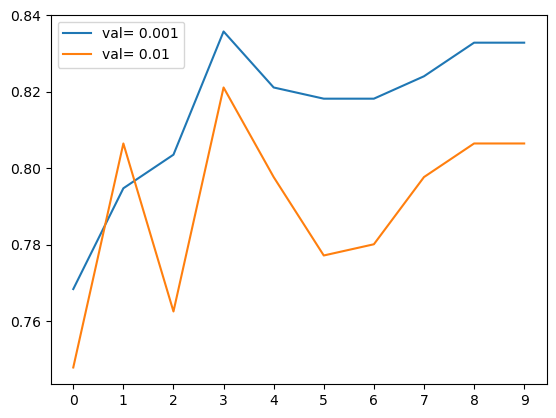

In [36]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train= %s' %lr))
    plt.plot(hist['val_accuracy'], label=('val= %s' %lr))

plt.xticks(np.arange(10))
plt.legend()

In [37]:
learning_rate = 0.001

#### Model checkpointing

In [41]:
model.save_weights('model_v1.h5', save_format='h5')

In [20]:
checkpoint_file_path =f"xception_v4_{size:03d}_{drop:.1f}_{epoch:02d}_{val_accuracy:.3f}.h5"
checkpointing = keras.callbacks.ModelCheckpoint(
    file_apth = os.path.join(checkpoint_file_path),
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)


NameError: name 'epoch' is not defined

In [44]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)

training_history = model.fit(train_ds, 
                             epochs=10, 
                             validation_data=valid_ds,
                             callbacks=[checkpointing])
                            

Epoch 1/10


2024-10-29 18:41:17.167050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.6255

2024-10-29 18:42:05.901678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 55s 559ms/step - loss: 1.1008 - accuracy: 0.6255 - val_loss: 0.7214 - val_accuracy: 0.7478
Epoch 2/10
96/96 [==============================] - 53s 550ms/step - loss: 0.6283 - accuracy: 0.7842 - val_loss: 0.6383 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 53s 558ms/step - loss: 0.5113 - accuracy: 0.8269 - val_loss: 0.5882 - val_accuracy: 0.8240
Epoch 4/10
96/96 [==============================] - 50s 520ms/step - loss: 0.4382 - accuracy: 0.8634 - val_loss: 0.5708 - val_accuracy: 0.8299
Epoch 5/10
96/96 [==============================] - 47s 486ms/step - loss: 0.3729 - accuracy: 0.8856 - val_loss: 0.5519 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 45s 470ms/step - loss: 0.3301 - accuracy: 0.9029 - val_loss: 0.5521 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 47s 486ms/step - loss: 0.2898 - accuracy: 0.9250 - val_loss: 0.5446 - val_accuracy: 0.8270
Epoch 8/10

##### adding more Dense layer

In [45]:
def make_model(learning_rate=0.01, inner_size=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [ ]:
scores = {}
learning_rate
for size in [10, 50, 100,1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, inner_size = size)
    training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds, callbacks=[checkpointing])
    scores[size]= training_history.history
    print()
    print()

10
Epoch 1/10


2024-10-30 14:28:18.873087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.4331 - accuracy: 0.5538

2024-10-30 14:29:02.194000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 54s 511ms/step - loss: 1.4331 - accuracy: 0.5538 - val_loss: 1.0641 - val_accuracy: 0.6891
Epoch 2/10
96/96 [==============================] - 48s 496ms/step - loss: 0.8989 - accuracy: 0.7125 - val_loss: 0.8533 - val_accuracy: 0.7478
Epoch 3/10
96/96 [==============================] - 47s 489ms/step - loss: 0.6821 - accuracy: 0.7849 - val_loss: 0.7464 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 50s 517ms/step - loss: 0.5778 - accuracy: 0.8100 - val_loss: 0.6680 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 47s 491ms/step - loss: 0.4857 - accuracy: 0.8426 - val_loss: 0.6261 - val_accuracy: 0.7713
Epoch 6/10
96/96 [==============================] - 51s 527ms/step - loss: 0.4187 - accuracy: 0.8673 - val_loss: 0.6158 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 49s 513ms/step - loss: 0.3730 - accuracy: 0.8814 - val_loss: 0.6077 - val_accuracy: 0.7859
Epoch 8/10

2024-10-30 14:36:26.413833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0402 - accuracy: 0.6532

2024-10-30 14:37:09.675402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 50s 501ms/step - loss: 1.0402 - accuracy: 0.6532 - val_loss: 0.6889 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 48s 499ms/step - loss: 0.5695 - accuracy: 0.7986 - val_loss: 0.6802 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 49s 513ms/step - loss: 0.4194 - accuracy: 0.8520 - val_loss: 0.5561 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 47s 487ms/step - loss: 0.3152 - accuracy: 0.8980 - val_loss: 0.5485 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 48s 498ms/step - loss: 0.2409 - accuracy: 0.9270 - val_loss: 0.5624 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 47s 488ms/step - loss: 0.1880 - accuracy: 0.9478 - val_loss: 0.5879 - val_accuracy: 0.8240
Epoch 7/10
28/96 [=======>......................] - ETA: 32s - loss: 0.1334 - accuracy: 0.9721

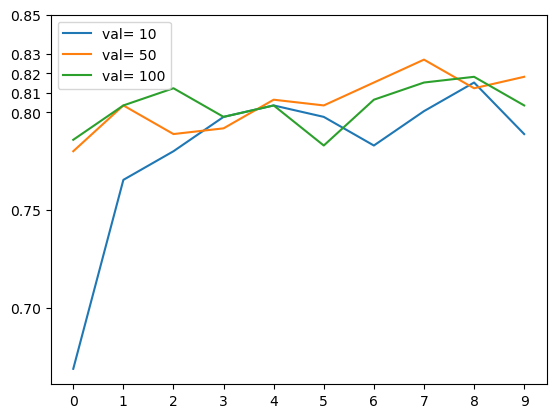

In [59]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train= %s' %size))
    plt.plot(hist['val_accuracy'], label=('val= %s' %size))

plt.xticks(np.arange(10))
plt.yticks([.70, 0.75,0.80, 0.81, 0.82, 0.83,0.85])
plt.legend()

### Adding Dropout

In [13]:
def make_model(learning_rate=0.01, inner_size=100,dropout_rate = 0.2):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    dropout = keras.layers.Dropout(dropout_rate)(inner)
    outputs = keras.layers.Dense(10)(dropout)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [25]:
class K_ModelCheckpointing(keras.callbacks.ModelCheckpoint):
    def __init__(self, epoch,
    def on_epoch_end(self, epoch,logs=None):
        val_accuracy = logs.get('val_accuracy', 0)
        self.filepath = f"xception_v4_{size:03d}_{drop:.1f}_{epochs:02d}_{val_accuracy:.3f}.h5"
        super().on_epoch_end(epoch, log)
        
#checkpoint_file_path =f"xception_v4_{size:03d}_{drop:.1f}_{epochs:02d}_{val_accuracy:.3f}.h5"
checkpointing = K_ModelCheckpointing(
    file_apth = '',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

TypeError: __init__() missing 1 required positional argument: 'filepath'

In [23]:
scores = {}
learning_rate=0.001
size = 10
epoch = 10
for drop in [0.0,0.1,0.2,0.5,0.7]:
    print(drop)
    
    model = make_model(learning_rate=learning_rate, 
                       inner_size = size, 
                       dropout_rate=drop)
    training_history = model.fit(train_ds, 
                                 epochs=epoch, 
                                 validation_data=valid_ds,
                                 callbacks=[checkpointing])
    scores[size]= training_history.history
    print()
    print()

0.0
Epoch 1/10


2024-10-30 15:03:08.485867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/96 [====>.........................] - ETA: 1:17 - loss: 1.9612 - accuracy: 0.3681

KeyboardInterrupt: 